In [160]:
"""
Created on Sun Jun 27 01:35:11 2021

@author: MHinojosaLee
"""

'\nCreated on Sun Jun 27 01:35:11 2021\n\n@author: MHinojosaLee\n'

In [161]:
import numpy as np
import pandas as pd
from matplotlib import animation as ani, pyplot as plt
import seaborn as sns #pretty graphics R style

from IPython.display import HTML
plt.style.use('seaborn-darkgrid')
from sklearn.inspection import permutation_importance
import matplotlib as mpl 
import matplotlib.pyplot as plt #graphics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler #library for the rescaling
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from treeinterpreter import treeinterpreter as ti, utils
import joblib
import getpass
from pathlib import Path

In [162]:
if getpass.getuser() == 'daniel':
    project_root_path = Path("//home/daniel/Projects/Python ML Pipeline")
    data_raw_path = project_root_path / 'data' / 'raw'
    data_output_path = project_root_path / 'data' / 'processed'
    # Lets read the trining dataset
    data_train = pd.read_csv(data_raw_path / 'train_V2.csv')
    # Now we read the training data set
    score = pd.read_csv(data_raw_path /  'score.csv')
    # We read the dictonary
    dict_features = pd.read_csv(data_raw_path /  'dictionary.csv', delimiter=';', header=None)
    
elif getpass.getuser() == 'maart':
    data_file_path = "C:/Users/maart/Machine Learning/ML-in-Python/data/raw/"
    # Lets read the trining dataset
    data_train = pd.read_csv(data_file_path+'train_V2.csv')
    # Now we read the training data set
    score = pd.read_csv(data_file_path+'score.csv')
    dict_features_path = data_file_path+'dictionary.csv'
    dict_features = pd.read_csv(dict_features_path, delimiter=';', header=None)
else:
      data_file_path = "C:/Users/mhinojosalee/Downloads/Machine learning with Python\Exam/"
      # Lets read the trining dataset
      data_train = pd.read_csv(data_file_path+'train_V2.csv')
      # Now we read the training data set
      score = pd.read_csv(data_file_path+'score.csv')

In [164]:
data_train.shape
pd.options.display.max_columns = None
data_train.head()


,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,True,2.0,1.0,28936.0,37.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,476.0,40.0,0.0,0.0,0.0,209.0,M,0.000000,0.0,0.0,0.0,0.467768,0.98334,NaN,NaN,NaN,NaN,0.838147,0.082288,NaN,NaN,1791.66,0,0.00
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,True,3.0,0.0,16674.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,2.0,0.0,0.0,0.0,4.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,True,4.0,0.0,32552.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,95.0,8.0,0.0,0.0,0.0,6.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,0.232375,0.099529,NaN,NaN,NaN,NaN,0.101955,1.743020,1001.40,0,0.00
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,True,8.0,1.0,32252.0,37.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,NaN,NaN,0.0,0.0,0.0,4.0,V,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.889793,NaN,NaN,NaN,NaN,1785.59,0,0.00
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,False,2.0,1.0,29605.0,26.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,354.0,30.0,0.0,0.0,0.0,3.0,V,1454.210627,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.330503,0.766294,0.490486,0.542445,NaN,NaN,3140.74,0,0.00


In [165]:

data_train.describe()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,shop_am,shop_use,retired,gold_status,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
count,4947.000000,4947.000000,4947.000000,4954.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4970.000000,4999.000000,4912.000000,4947.000000,4947.000000,4761.000000,4947.000000,4947.000000,4947.000000,4912.000000,4912.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4608.000000,4608.000000,4947.000000,4947.000000,4973.000000,4947.000000,4947.000000,4912.000000,4947.000000,4947.000000,1.225000e+03,1.314000e+03,1.209000e+03,1.304000e+03,1.261000e+03,1.367000e+03,1.223000e+03,1.324000e+03,1.232000e+03,1493.000000,5000.000000,5000.000000,5000.000000
mean,2281.260158,696.057712,3637.900950,145.952967,0.352335,3298.716394,0.041237,0.024661,0.094199,0.390944,0.401811,0.024205,6.051507,5.646250,0.287043,32778.558916,44.901152,0.495452,0.883970,0.049267,0.004275,1.298565,0.213463,0.889832,0.252678,0.102486,1.960986,0.385082,273.111545,22.780165,0.018597,0.218314,121.078826,28.992521,403.019960,0.151873,0.182131,0.034769,4.997356e-01,5.003663e-01,4.985522e-01,4.967340e-01,4.942801e-01,4.985876e-01,4.962065e-01,5.013962e-01,5.009593e-01,5.192953,1967.310930,0.255400,189.970736
std,8365.254507,3051.119275,5726.625669,581.068095,0.889449,4549.646039,0.198858,0.155107,0.292134,0.488011,0.490313,0.153700,3.112104,5.052513,0.452427,6858.671948,16.225094,0.500030,0.320293,0.216447,0.065252,0.800831,0.826006,0.313130,0.434592,0.303317,0.805545,0.832933,152.498416,12.719429,0.135111,0.712408,1783.146726,37.480510,1335.935144,0.358934,0.385991,0.183212,2.879255e-01,2.887168e-01,2.877572e-01,2.897994e-01,2.899165e-01,2.877292e-01,2.886538e-01,2.876226e-01,2.901323e-01,3.159868,1371.061266,0.436129,379.005941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,-7.871775,10.680000,0.000000,0.000000
25%,229.000000,0.000000,1638.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,28630.000000,31.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,154.000000,13.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2.520205e-01,2.510338e-01,2.521282e-01,2.454209e-01,2.405574e-01,2.495061e-01,2.474100e-01,2.506703e-01,2.514905e-01,3.124958,1333.320000,0.000000,0.000000
50%,469.000000,52.000000,1889.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,5.000000,0.000000,31990.000000,45.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,271.000000,23.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,4.974162e-01,4.986215e-01,4.987791e-01,4.985832e-01,4.942465e-01,5.016458e-01,4.933486e-01,5.020603e-01,5.029121e-01,5.188006,1721.235000,0.000000,0.000000
75%,1688.000000,810.000000,3165.500000,0.000000,0.000000,5000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,9.000000,8.000000,1.000000,35924.000000,57.000000,1.000000,1.00

In [130]:
# total = data_train.isnull().sum().sort_values(ascending=False)
# percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
# (data_train.isnull().sum(axis=1))[data_train.isnull().sum(axis=1) > 30]
# table
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# print(missing_data.head(30))
# print(data_train['score2_pos'].value_counts())
# data_train = data_train.drop((missing_data[missing_data['Percent'] > 0.30]).index,1)
# data_train.dropna(inplace=True) 
#we could drop all that is NaN, but we will loose observations. (4425, 43) instead of (4425, 43) 

In [131]:
print(data_train.columns)
data_feat = data_train.drop(['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'], axis=1)
print(data_feat.shape)

Index(['income_am', 'profit_last_am', 'profit_am', 'damage_am', 'damage_inc',
       'crd_lim_rec', 'credit_use_ic', 'gluten_ic', 'lactose_ic',
       'insurance_ic', 'spa_ic', 'empl_ic', 'cab_requests', 'married_cd',
       'bar_no', 'sport_ic', 'neighbor_income', 'age', 'marketing_permit',
       'urban_ic', 'dining_ic', 'presidential', 'client_segment', 'sect_empl',
       'prev_stay', 'prev_all_in_stay', 'divorce', 'fam_adult_size',
       'children_no', 'tenure_mts', 'tenure_yrs', 'company_ic', 'claims_no',
       'claims_am', 'nights_booked', 'gender', 'shop_am', 'shop_use',
       'retired', 'gold_status', 'score1_pos', 'score1_neg', 'score2_pos',
       'score2_neg', 'score3_pos', 'score3_neg', 'score4_pos', 'score4_neg',
       'score5_pos', 'score5_neg', 'outcome_profit', 'outcome_damage_inc',
       'outcome_damage_amount'],
      dtype='object')
(5000, 50)


In [132]:
print(score.shape)
datafull = pd.concat([data_feat, score])
print(datafull.shape)
print(datafull['client_segment'].value_counts())
print(datafull['sect_empl'].value_counts())
print(datafull['gender'].value_counts())
print(datafull['retired'].value_counts())
print(datafull['gold_status'].value_counts())
print(datafull['prev_stay'].value_counts())
print(datafull['divorce'].value_counts())
print(datafull['married_cd'].value_counts())

(500, 50)
(5500, 50)
1.0    3712
2.0     925
0.0     352
3.0     329
4.0      87
5.0      38
Name: client_segment, dtype: int64
0.0    4820
1.0     468
6.0      78
2.0      45
4.0      29
3.0       3
Name: sect_empl, dtype: int64
M    2734
V    2709
Name: gender, dtype: int64
0.0    4456
1.0     987
Name: retired, dtype: int64
0.0    5241
1.0     202
Name: gold_status, dtype: int64
1.0    4848
0.0     595
Name: prev_stay, dtype: int64
0.0    4884
1.0     559
Name: divorce, dtype: int64
True     4460
False    1040
Name: married_cd, dtype: int64


In [133]:
# datafull['client_segment'] = pd.Categorical(datafull['client_segment'])
# datafull['sect_empl'] = pd.Categorical(datafull['sect_empl'])
# datafull['retired'] = pd.Categorical(datafull['retired'])
# datafull['gold_status'] = pd.Categorical(datafull['gold_status'])
# datafull['prev_stay'] = pd.Categorical(datafull['prev_stay'])
# datafull['divorce'] = pd.Categorical(datafull['divorce'])

impute_mode = SimpleImputer (strategy='most_frequent')
for cols in ['client_segment', "credit_use_ic", "gluten_ic", "lactose_ic","insurance_ic","marketing_permit", "presidential", "urban_ic", "prev_all_in_stay", "shop_use", 
             "company_ic", "dining_ic", "spa_ic","sport_ic","empl_ic",'sect_empl', "retired", "gold_status", "prev_stay", 'divorce', "gender"]:  
      datafull[cols] = impute_mode.fit_transform(datafull[[cols]])

In [134]:
datafull['client_segment'] = pd.Categorical(datafull['client_segment'])
datafull['sect_empl'] = pd.Categorical(datafull['sect_empl'])
# The NaN categorie won't be necessary anymore, thanks to the mode imputing.
pd.get_dummies(datafull[['client_segment', 'sect_empl']], dummy_na=False).head()
print(datafull.shape)
datafull2 = pd.concat([datafull,pd.get_dummies(datafull[['gender','client_segment', 'sect_empl']], dummy_na=False)], axis=1)
print(datafull2.shape)
print(datafull2.head(1000))     

(5500, 50)
(5500, 64)
     income_am  profit_last_am  profit_am  damage_am  damage_inc  crd_lim_rec  \
0        227.0             0.0     3201.0      888.0         6.0      15000.0   
1        268.0            16.0     1682.0        0.0         0.0        750.0   
2        283.0            23.0     1673.0        0.0         0.0        750.0   
3        227.0             0.0     1685.0        0.0         0.0          0.0   
4       4091.0          1028.0     3425.0      785.0         2.0      14000.0   
..         ...             ...        ...        ...         ...          ...   
995     3103.0             0.0     9466.0     1206.0         2.0      12500.0   
996        NaN             NaN        NaN        NaN         NaN          NaN   
997      250.0           823.0     1646.0        0.0         0.0       1500.0   
998     6382.0           561.0     7265.0        0.0         0.0       1500.0   
999     5556.0          2464.0     2464.0        0.0         0.0          0.0   

     

In [135]:
print(datafull2.shape)
datafull2.drop(['client_segment', 'sect_empl', 'gender', 'client_segment_5.0','sect_empl_6.0','gender_V'], axis=1, inplace=True)
print(datafull2.shape)

datafull2['profitpernight'] = datafull2['profit_am'] / datafull2['nights_booked']

(5500, 64)
(5500, 58)


In [136]:
# During class it was mentioned that sometimes it was not worthy to use a very complex thing like sof imputing to avoid dropping these features. 
# I am using something simple, that is a mean imputing, because these columns were the scores, and I did not want to drop them.
# The scores are quantitative.

impute_quant = SimpleImputer (strategy='mean')
for cols in ['score1_pos', 'score1_neg', 'score2_pos', 'score2_neg', 'score3_pos',
       'score3_neg', 'score4_pos', 'score4_neg', 'score5_pos', 'score5_neg']:  # Missing data, Scores are quantitative
      datafull2[cols] = impute_quant.fit_transform(datafull2[[cols]])

In [137]:
print(datafull2.shape)
datafull2.dropna(thresh = datafull2.shape[1]*0.3, axis = 0, inplace = True)
print(datafull2.shape)
# And here we find that there are not missing values from the rows (no missing values per row). So we go to imputting the rest of the missing values

(5500, 59)
(5500, 59)


In [138]:
print(datafull2.isnull().sum().sum())
datafull2.fillna(datafull2.mean(), inplace=True)
print(datafull2.isnull().sum().sum())

2033
0


In [139]:
scaler = StandardScaler()
datafull3 = pd.DataFrame(scaler.fit_transform(datafull2))
datafull3.columns = datafull2.columns


In [140]:
data_train = pd.concat([data_train[['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount']],datafull3[0:5000]], axis=1)
print(data_train.shape)
score = datafull3[5000:5500] #The score dataset will be the last 500 observations
score.shape

(5000, 62)


(500, 59)

In [141]:
score.to_pickle(data_output_path / "score_v3.pkl")
data_train.to_pickle(data_output_path / "data_train_v3.pkl")


In [142]:
X_train, X_test, y_train, y_test = train_test_split(data_train.drop(['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'],1),
                                                    data_train['outcome_profit'], test_size=0.2, random_state=48)

In [143]:
# Our model will try 500 random hyperparameter combinations, each time using 5 Cross Validation folds, totalling 2500 fits
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]
learning_rate = [x for x in np.logspace(start = -3, stop = -0.01, num = 50)]
max_features = ['auto']
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
min_samples_split = [2, 5, 10, 30]
min_samples_leaf = [1, 2, 4, 10, 30]
subsample = [0.4, 0.6, 0.8, 1]
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'subsample': subsample}
gbm = GradientBoostingRegressor()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 500, cv = 5, verbose=2, random_state=42, n_jobs = -1)
gbm_random.fit(X_train, y_train)
gbm_random.best_params_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


{'subsample': 0.4,
 'n_estimators': 926,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 4,
 'learning_rate': 0.012542015897895777}

In [144]:
joblib.dump(gbm_random, 'random_search_gbm.pkl')

['random_search_gbm.pkl']

In [145]:
pd.DataFrame(gbm_random.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.242819,0.136521,0.007920,0.001248,0.8,816,5,4,auto,1,0.001524,"{'subsample': 0.8, 'n_estimators': 816, 'min_s...",0.515709,0.428516,0.563760,0.443499,0.419924,0.474282,0.056070,451
1,34.049532,1.326523,0.031579,0.003242,1,797,30,10,auto,8,0.009469,"{'subsample': 1, 'n_estimators': 797, 'min_sam...",0.668678,0.737096,0.848464,0.784044,0.809786,0.769614,0.062104,53
2,6.374234,1.132263,0.014939,0.003410,0.4,706,30,30,auto,3,0.001524,"{'subsample': 0.4, 'n_estimators': 706, 'min_s...",0.546023,0.346928,0.482659,0.575659,0.536576,0.497569,0.081096,443
3,3.219431,0.881686,0.008017,0.004271,0.8,155,2,10,auto,4,0.136683,"{'subsample': 0.8, 'n_estimators': 155, 'min_s...",0.639944,0.745853,0.843098,0.739750,0.801857,0.754100,0.068566,128
4,19.769181,0.899600,0.028170,0.008186,0.8,908,30,10,auto,5,0.002323,"{'subsample': 0.8, 'n_estimators': 908, 'min_s...",0.660182,0.657384,0.822253,0.745430,0.759271,0.728904,0.062844,204


In [146]:
pd.DataFrame(gbm_random.cv_results_).loc[pd.DataFrame(gbm_random.cv_results_)['mean_test_score'].idxmax()]

mean_fit_time                                                        8.67773
std_fit_time                                                         0.11832
mean_score_time                                                     0.022442
std_score_time                                                      0.003265
param_subsample                                                          0.4
param_n_estimators                                                       926
param_min_samples_split                                                    2
param_min_samples_leaf                                                     1
param_max_features                                                      auto
param_max_depth                                                            4
param_learning_rate                                                 0.012542
params                     {'subsample': 0.4, 'n_estimators': 926, 'min_s...
split0_test_score                                                   0.776349

In [147]:
params = gbm_random.best_params_
gbm_profit = GradientBoostingRegressor(**params)
gbm_profit.fit(X_train, y_train)
# I got R2: 0.953 for the X_train and R2: 0.822 for the X_test
print('R2: %.3f' % gbm_profit.score(X_train, np.array(y_train).reshape(-1,1)))
print('R2: %.3f' % gbm_profit.score(X_test, np.array(y_test).reshape(-1,1))) #Here we are using the "holdout" set already

R2: 0.926
R2: 0.838


In [166]:
profit_preds = gbm_profit.predict(score)


ValueError: could not convert string to float: 'V'

In [168]:
np.save(data_output_path / "profit_preds_v3.pkl", profit_preds)


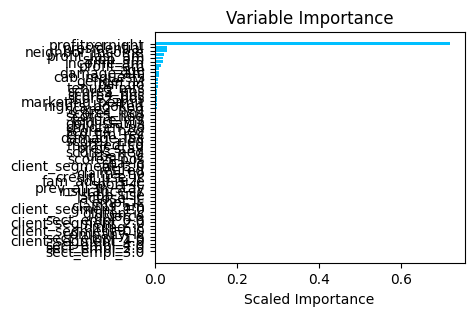

In [149]:
# We were interested in identifying what were the variables that mattered, so we used Variable importances based on impurity reduction.

gbm_profit.feature_importances_.sum()
d = {'feature':X_train.columns, 'importance':gbm_profit.feature_importances_}
importances = pd.DataFrame(data=d)
importances.sort_values('importance', ascending=False,inplace=True)

plt.rcdefaults()
plt.rcParams['figure.figsize'] = (4, 3)
fig, ax = plt.subplots()
variables = importances.feature
y_pos = np.arange(len(variables))
scaled_importance = importances.importance
ax.barh(y_pos, scaled_importance, align='center', color='deepskyblue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()
# This graphic is unorganized. All the variables are shown in the y axis, it is difficult to read them. So Next, I will organize it.

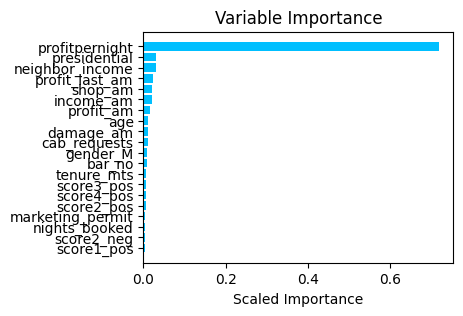

In [150]:
importances2 = importances.copy()
importances2 = importances2.head(20)
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams['figure.figsize'] = (4, 3)
fig, ax = plt.subplots()
variables = importances2.feature
y_pos = np.arange(len(variables))
scaled_importance = importances2.importance
ax.barh(y_pos, scaled_importance, align='center', color='deepskyblue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()
# And now we have a nice plot

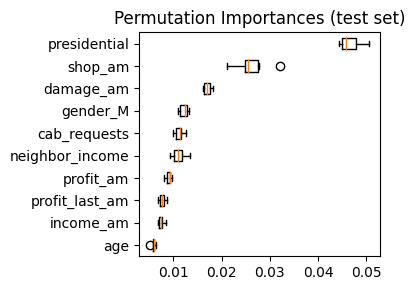

In [151]:
imp = permutation_importance(gbm_profit, X_train, y_train,n_repeats=10,
                                random_state=42, n_jobs=2)



sorted_idx = imp.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(imp.importances[sorted_idx][48:58].T,
           vert=False, labels=X_train.columns[sorted_idx][48:58])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()
# Feature importance and Permutation importance identify the same 2 strongly predictive features for our model for Profit: Profit and Nights booked, which makes sense

### Prediction of damage (binary)

In [152]:
data_train.outcome_damage_inc.value_counts()

0    3723
1    1277
Name: outcome_damage_inc, dtype: int64

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train.drop(['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'],1), 
                                                    data_train['outcome_damage_inc'], test_size=0.2, random_state=9876)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]
learning_rate = [x for x in np.logspace(start = -3, stop = -0.01, num = 50)]
max_features = ['auto']
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
min_samples_split = [2, 5, 10, 30]
min_samples_leaf = [1, 2, 4, 10, 30]
subsample = [0.4, 0.6, 0.8, 1]
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'subsample': subsample}
gbm = GradientBoostingClassifier()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=4872, n_jobs = -1)
gbm_random.fit(X_train, y_train)
gbm_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'subsample': 0.4,
 'n_estimators': 504,
 'min_samples_split': 30,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 2,
 'learning_rate': 0.012542015897895777}

In [154]:
params = gbm_random.best_params_
gbm_damagebin = GradientBoostingClassifier(**params)
gbm_damagebin.fit(X_train, y_train)
print('Train accuracy: %.3f' % gbm_damagebin.score(X_train, y_train))
print('Test accuracy: %.3f' % gbm_damagebin.score(X_test, y_test))

Train accuracy: 0.773
Test accuracy: 0.746


In [169]:
damagebin_preds = gbm_damagebin.predict_proba(score)
np.save(data_output_path / "damagebin_preds_v3.pkl", damagebin_preds)


ValueError: could not convert string to float: 'V'